In [50]:
#Steps

# 1.Preprocess + EDA + Feature Selection
# 2.Extract Input and output cols
# 3.Scale the values
# 4.Train test split
# 5.Train the model
# 6.Evaluate the model/model selection
# 7.Deploy the model

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("placement.csv")

In [65]:
df.head()
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [69]:
df.shape

(100, 4)

In [71]:
df=df.iloc[:,1:]

In [73]:
df.shape

(100, 3)

In [75]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Here preprocess completes


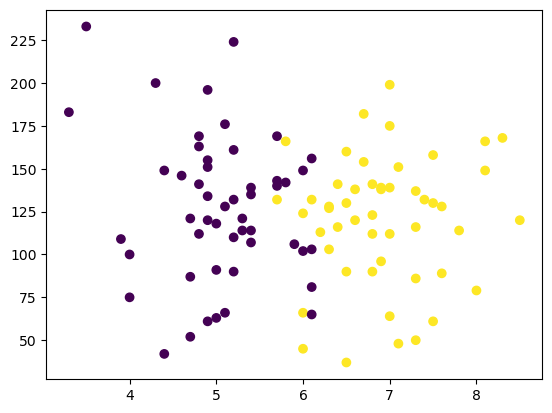

In [83]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


EDA Completed

In [86]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [90]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [93]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

Here Extract input AND OUTPUT columns are splitted

In [100]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [102]:
x_train

,cgpa,iq
38,6.5,160.0
50,3.5,233.0
84,5.7,169.0
19,5.2,132.0
65,8.1,166.0
...,...,...
40,4.9,134.0
62,6.0,102.0
55,7.8,114.0
14,6.1,103.0


In [104]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()             
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [116]:
x_train

array([[ 0.44147571,  0.89122303],
       [-2.12745621,  2.70908559],
       [-0.2435728 ,  1.11534307],
       [-0.67172812,  0.19396068],
       [ 1.81157273,  1.04063639],
       [-0.500466  , -0.42859499],
       [-1.01425238,  1.11534307],
       [ 0.86963103,  1.86240988],
       [ 0.01332039, -1.97253306],
       [-0.500466  ,  0.36827627],
       [ 1.29778635,  0.84141858],
       [-0.67172812,  2.48496555],
       [ 0.09895145, -1.47448852],
       [-0.2435728 ,  0.46788517],
       [ 0.78399996,  0.34337404],
       [-0.58609706, -0.25427941],
       [ 1.21215528,  0.19396068],
       [-0.84299025, -1.52429297],
       [ 0.52710677,  0.34337404],
       [ 0.44147571,  0.14415622],
       [-0.75735919,  1.28965866],
       [-0.58609706, -0.07996382],
       [ 0.09895145, -1.07605289],
       [ 1.29778635,  0.14415622],
       [ 0.01332039, -0.00525714],
       [-0.75735919, -1.44958629],
       [ 0.78399996, -0.70251949],
       [ 0.52710677, -0.10486604],
       [-0.2435728 ,

In [ ]:
#Model Training
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)


In [142]:
y_pred = clf.predict(x_test)

In [148]:
y_test

71    1
21    1
87    1
35    1
98    1
96    0
97    1
0     1
92    0
41    0
Name: placement, dtype: int64

In [150]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,y_pred)

0.9

In [158]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

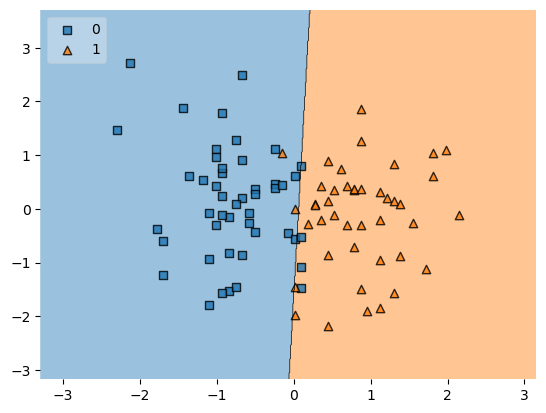

In [160]:
plot_decision_regions(x_train,y_train.values ,clf=clf,legend=2)

In [162]:
import pickle

In [164]:
pickle.dump(clf,open('model.pkl','wb'))